### <center>__MÉTODOS NUMÉRICOS__</center>
#### <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: JONATAS DA SILVA DUARTE__</center>
#### <center>__1° PROJETO: MODELAGEM DE TÓPICOS COM NMF E SVD__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Na matemática, regressão linear é uma equação para estimar o valor esperado de uma determinada variável, dado os valores de outras variáveis. De maneira geral, a regressão foca em tratar de um valor que a priori não conseguimos estimá-lo a ppartir de outros, enquanto que o nome “linear” vem da função linear que ocasiona dá resposta às variáveis. 

Para entender melhor, basta pensarmos em quando vemos uma relação em um determinado diagrama de dispersão, nele podemos usar uma reta para resumir essa relação nos dados, assim como usar a mesma reta para fazer previsões a partir dos dados.

Com isso, surge um forte potencial de aplicação na área da saúde, já que conseguimos mensurar desvios, médias, ter uma noção estatística de quadros em gerais, agir com mais precisão e principalmente prever esses e outros fatores baseados em uma grande quantidade de dados, o que aumenta a qualidade das estratégias, tornando-se muito valioso considerando o grande impacto positivo.


<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Regressão linear é um método que modela a relação entre uma ou mais variáveis independentes e uma variável dependente. Seguindo essa lógica, na imagem abaixo, qual seria a reta que se ajusta aos dados?

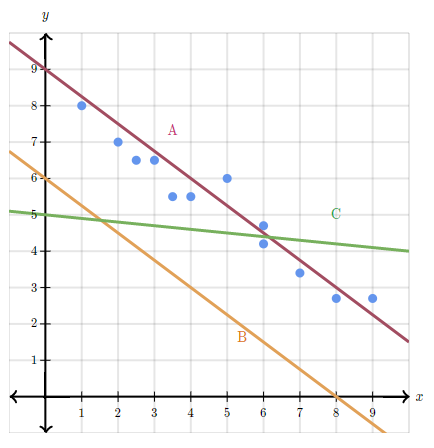

Baseado no que foi falado, a reta correspondente seria a de *letra A (vermelha)*. Ela, basicamente, “corta” os nossos dados, passando pelo meio e traçando um certo padrão neles e a partir disso podemos tirar as devidas conclusões, ou seja, após ajustarmos essa reta, somos capazes de encontrar sua equação e usá-la para fazer previsões. Essa forma de análise estima os coeficientes da equação linear, envolvendo uma ou mais variáveis independentes que melhor preveem o valor da variável dependente.

Modelos de regressão linear são relativamente simples e ainda fornecem uma fórmula matemática de fácil compreensão e capaz de gerar previsões, isso os torna uma ferramenta muito útil para diversas áreas de estudo, já que estes se tornaram quase que uma maneira comprovada de prever o futuro. Isso demonstra o grande potencial para a área de saúde, onde a capacidade de identificar padrões e prever é algo capaz de salvar vidas e/ou melhorá-las.

Alguns exemplos da utilização de regressão linear na saúde: 

* Desenvolvimento de um modelo de regressão linear para a predição da prevalência de
esquistossomose no Estado de Minas Gerais (http://marte.sid.inpe.br/col/dpi.inpe.br/sbsr@80/2006/11.14.20.06/doc/2573-2580.pdf)


* Aplicação de regressão linear para correção de dados dietéticos (https://www.scielosp.org/article/rsp/2007.v41n2/190-196/)
    * O artigo mostra como estratégias metodológicas vêm sendo desenvolvidas para minimizar o efeito do erro de medida da dieta.



* Aprimorando a previsão do tempo total do procedimento cirúrgico usando modelagem de regressão linear (https://www.frontiersin.org/articles/10.3389/fmed.2017.00085/full)
    * O artigo retrata como a previsão do tempo de um determinado procedimento cirúrgico pode impactar em salas de cirurgia, agendamentos das cirurgias, planejamento médico, uso de ferramentas e etc, e como isso ajuda na gestão de tempo, pessoas e gastos.




<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

 Foi utilizado a regressão linear como base fundamental para as aplicações e mais alguns conceitos ligados a ela. Tivemos os métodos SVD (Decomposição de Valor Singular) e QR Decomposition.


**SVD**, já foi discutido no projeto anterior (sobre modelagem de tópicos), mas é basicamente um método de decomposição de matrizes para reduzir uma matriz às suas partes constituintes, a fim de simplificar certos cálculos de matrizes subsequentes. Assim, o algoritmo SVD fatora uma matriz em uma matriz com colunas ortogonais e outra com linhas ortogonais.

**QR Decomposition** (ou QR Factorization), em álgebra linear,  é a decomposição de uma matriz A em um produto A = QR de uma matriz ortogonal Q e de uma matriz triangular superior R. Este método é muito semelhante à decomposição LU e é muito usado para resolver mínimos quadrados lineares. Seu uso se destaca devido à sua estabilidade numérica, embora seja um pouco mais lento na execução. 

Ao decorrer da implementação também foram usadas mais algumas técnicas e conceitos, tais quais:

 * *Método dos Mínimos Quadrados (MMQ)*, que é uma técnica de otimização matemática, onde busca encontrar o melhor ajuste para um determinado conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados. Um requisito básico é que o modelo seja linear nos parâmetros, ou seja, as variáveis apresentam uma relação linear entre si.

* *Fatoração de Cholesky*, consiste é uma decomposição de uma matriz hermitiana e positiva definida no produto de uma matriz triangular inferior e sua matriz adjunta. Quando aplicável, essa fatoração chega a ser duas vezes mais eficiente que a decomposição LU para resolver sistemas de equações lineares (incrível, né?!)


* *Número de condição*, é basicamente uma medida de quão pequenas mudanças na entrada fazem com que a saída mude.


* *Condicionamento*, é o comportamento de perturbação de um problema matemático (por exemplo, mínimos quadrados)


* *Estabilidade*, semelhante ao condicionamennto, também é um comportamento de perturbação de um algoritmo, mas é usado para resolver esse problema em um computador(por exemplo, algoritmos de mínimos quadrados, eliminação gaussiana)


<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [1]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
import pandas as pd


O dataset utilizado é um conjunto de dados sobre diabetes e foi retirado da biblioteca Scikit Learn. Em seguida vamos pega-los e dividi-los nas matrizes:

In [2]:
data = datasets.load_diabetes()

In [3]:
feature_names=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
trn,test,y_trn,y_test = train_test_split(data.data, data.target, test_size=0.2)


In [5]:
## Função pro coeficiente angular e termo independente
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), 
     metrics.mean_absolute_error(act, pred))

In [6]:
trn_int = np.c_[trn, np.ones(trn.shape[0])]
test_int = np.c_[test, np.ones(test.shape[0])]

Usando QR Decomposition

In [7]:
def ls_qr(A,b):
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b)

In [8]:
%timeit coeffs_qr = ls_qr(trn_int, y_trn)

168 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
coeffs_qr = ls_qr(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_qr)

(52.839937127721996, 40.24398640061339)

Fatoração de Cholesky

In [10]:
A = trn_int
b = y_trn

In [11]:
AtA = A.T @ A
Atb = A.T @ b

In [12]:
R = scipy.linalg.cholesky(AtA)

In [13]:
np.set_printoptions(suppress=True, precision=4)
R

array([[ 0.9007,  0.1582,  0.2024,  0.3126,  0.2499,  0.2305, -0.1016,
         0.2158,  0.2386,  0.266 , -0.0076],
       [ 0.    ,  0.8795,  0.0797,  0.1824, -0.0466,  0.0538, -0.3151,
         0.2295,  0.0805,  0.1412, -0.0332],
       [ 0.    ,  0.    ,  0.8653,  0.2953,  0.1888,  0.1816, -0.262 ,
         0.3139,  0.3613,  0.3073, -0.6323],
       [ 0.    ,  0.    ,  0.    ,  0.7674,  0.0749, -0.0005,  0.033 ,
        -0.011 ,  0.1491,  0.1758, -0.0033],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.8474,  0.7522,  0.1636,
         0.3487,  0.3196,  0.1428, -0.1158],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3605, -0.3366,
         0.2366, -0.3542, -0.0123, -0.4443],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.6382,
        -0.5261, -0.5258, -0.1568, -1.0806],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.2964, -0.0402,  0.0422, -1.1756],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
 

In [14]:
np.linalg.norm(AtA - R.T @ R)

4.142114336247302e-16

In [15]:
w = scipy.linalg.solve_triangular(R, Atb, lower=False, trans='T')

In [16]:
np.linalg.norm(R.T @ w - Atb)

7.278899110610198e-12

In [17]:
## Resoluação da equação
coeffs_chol = scipy.linalg.solve_triangular(R, w, lower=False)

In [18]:
np.linalg.norm(R @ coeffs_chol - w)

1.8033521790747422e-14

In [19]:
## a função
def ls_chol(A, b):
    R = scipy.linalg.cholesky(A.T @ A)
    w = scipy.linalg.solve_triangular(R, A.T @ b, trans='T')
    return scipy.linalg.solve_triangular(R, w)

In [20]:
%timeit coeffs_chol = ls_chol(trn_int, y_trn)

94.1 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
coeffs_chol = ls_chol(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_chol)

(52.83993712772199, 40.24398640061338)

Agora, usando o método SVD

In [22]:
def ls_svd(A,b):
    m, n = A.shape
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b)/ sigma
    return Vh.T @ w

In [23]:
%timeit coeffs_svd = ls_svd(trn_int, y_trn)

148 µs ± 2.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
coeffs_svd = ls_svd(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_svd)

(52.83993712772204, 40.24398640061339)

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

Para o caso de uso, usarei o conjunto de dados também disponibilizado pela Scikit Learn, sobre cancer de mama. Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [25]:
## immportando nosso dataset
data = datasets.load_breast_cancer()
data

{'data': array([[ 17.99  ,  10.38  , 122.8   , ...,   0.2654,   0.4601,   0.1189],
        [ 20.57  ,  17.77  , 132.9   , ...,   0.186 ,   0.275 ,   0.089 ],
        [ 19.69  ,  21.25  , 130.    , ...,   0.243 ,   0.3613,   0.0876],
        ...,
        [ 16.6   ,  28.08  , 108.3   , ...,   0.1418,   0.2218,   0.0782],
        [ 20.6   ,  29.33  , 140.1   , ...,   0.265 ,   0.4087,   0.124 ],
        [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.2871,   0.0704]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [26]:
## Aqui realizamos o mmesmo processo da implementação
trn,test,y_trn,y_test = train_test_split(data.data, data.target, test_size=0.2)
trn_int = np.c_[trn, np.ones(trn.shape[0])]
test_int = np.c_[test, np.ones(test.shape[0])]

Usando QR Decomposition

In [27]:
%timeit coeffs_qr = ls_qr(trn_int, y_trn)

309 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
coeffs_qr = ls_qr(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_qr)

(0.24218254362321637, 0.18862442550135355)

Fatoração de Cholesky

In [29]:
A = trn_int
b = y_trn

In [30]:
AtA = A.T @ A
Atb = A.T @ b

In [31]:
R = scipy.linalg.cholesky(AtA)

In [32]:
np.linalg.norm(AtA - R.T @ R)

1.203002405960087e-07

In [35]:
w = scipy.linalg.solve_triangular(R, Atb, lower=False, trans='T')

In [36]:
## Resoluação da equação
coeffs_chol = scipy.linalg.solve_triangular(R, w, lower=False)

In [37]:
%timeit coeffs_chol = ls_chol(trn_int, y_trn)

114 µs ± 634 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [38]:
coeffs_chol = ls_chol(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_chol)

(0.24218254362321825, 0.1886244255013933)

Com SVD

In [39]:
%timeit coeffs_svd = ls_svd(trn_int, y_trn)

447 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
coeffs_svd = ls_svd(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_svd)

(0.2421825436232161, 0.1886244255013534)